# Task:

Exercises from Chapter 8: “Tree-Based Methods" in An Introduction to Statistical Learning with Applications in Python (Springer, 2023), Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani:

Exercises: 8, 9

# Zadanie 8a

In [1]:
from ISLP import load_data
from sklearn.model_selection import train_test_split
import pandas as pd

Carseats = load_data('Carseats')

Carseats = pd.get_dummies(Carseats, drop_first=True)

X = Carseats.drop(columns=['Sales'])
y = Carseats['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Zadanie 8b

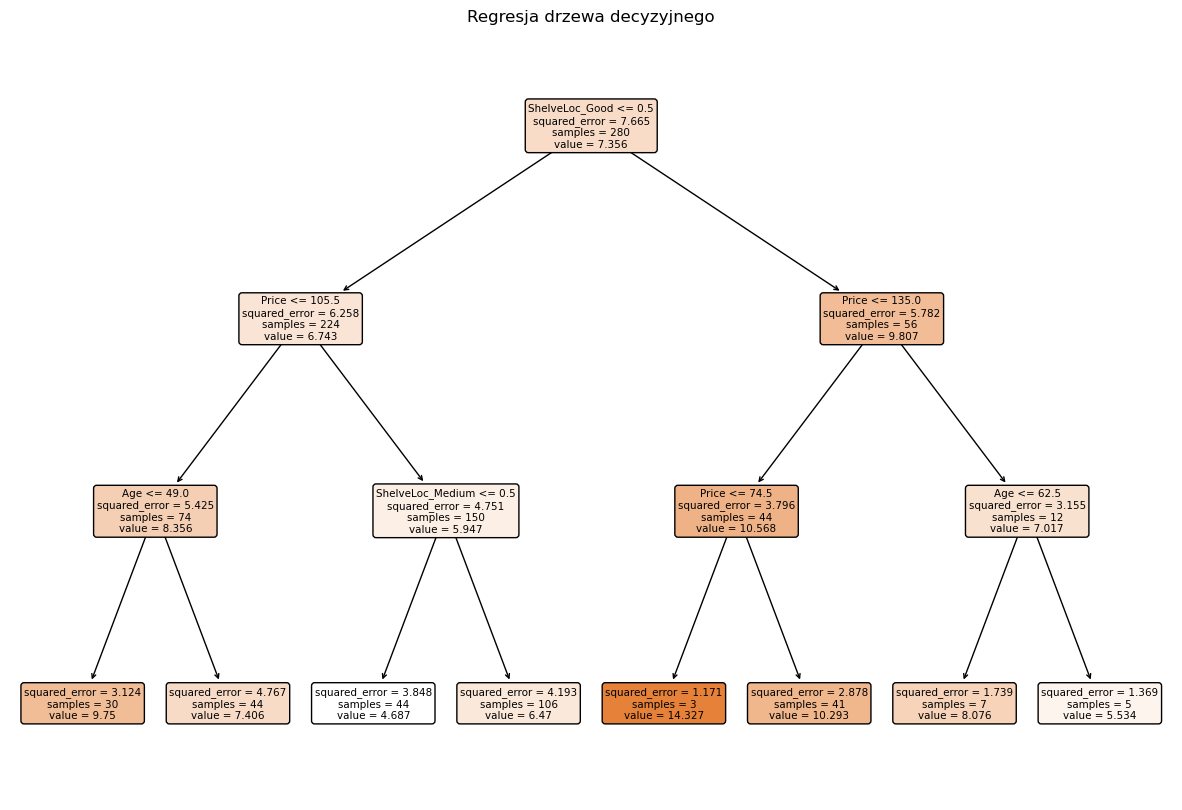

|--- ShelveLoc_Good <= 0.50
|   |--- Price <= 105.50
|   |   |--- Age <= 49.00
|   |   |   |--- value: [9.75]
|   |   |--- Age >  49.00
|   |   |   |--- value: [7.41]
|   |--- Price >  105.50
|   |   |--- ShelveLoc_Medium <= 0.50
|   |   |   |--- value: [4.69]
|   |   |--- ShelveLoc_Medium >  0.50
|   |   |   |--- value: [6.47]
|--- ShelveLoc_Good >  0.50
|   |--- Price <= 135.00
|   |   |--- Price <= 74.50
|   |   |   |--- value: [14.33]
|   |   |--- Price >  74.50
|   |   |   |--- value: [10.29]
|   |--- Price >  135.00
|   |   |--- Age <= 62.50
|   |   |   |--- value: [8.08]
|   |   |--- Age >  62.50
|   |   |   |--- value: [5.53]

Średni błąd kwadratowy (MSE) dla zbioru testowego: 4.8070

             Feature  Importance
4              Price    0.415346
7     ShelveLoc_Good    0.386508
5                Age    0.107363
8   ShelveLoc_Medium    0.090784
0          CompPrice    0.000000
1             Income    0.000000
2        Advertising    0.000000
3         Population    0.000000
6

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

reg_tree = DecisionTreeRegressor(max_depth=3, random_state=42)
reg_tree.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regresja drzewa decyzyjnego")
plt.show()

print(export_text(reg_tree, feature_names=list(X.columns), show_weights=True))

y_pred = reg_tree.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
print(f"Średni błąd kwadratowy (MSE) dla zbioru testowego: {test_mse:.4f}\n")

feature_importance = reg_tree.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Zadanie 8c

In [3]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor

param_grid = {'max_depth': range(1, 11)}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

print(f"Najlepsza głębokość drzewa (max_depth): {grid_search.best_params_['max_depth']}")
print(f"Najlepszy wynik walidacji (negatywne MSE): {-grid_search.best_score_:.4f}")

optimal_tree = grid_search.best_estimator_
optimal_tree.fit(X_train, y_train)

y_pred_optimal = optimal_tree.predict(X_test)
test_mse_optimal = mean_squared_error(y_test, y_pred_optimal)
print(f"Testowy średni błąd kwadratowy (MSE) dla optymalnego drzewa: {test_mse_optimal:.4f}")

Najlepsza głębokość drzewa (max_depth): 6
Najlepszy wynik walidacji (negatywne MSE): 4.4011
Testowy średni błąd kwadratowy (MSE) dla optymalnego drzewa: 4.1425


# Zadanie 8d

Testowy MSE dla Baggingu: 2.5451

Znaczenie cech w Bagging:
             Feature  Importance
4              Price    0.314770
7     ShelveLoc_Good    0.194939
5                Age    0.127246
0          CompPrice    0.105046
2        Advertising    0.072813
1             Income    0.052941
8   ShelveLoc_Medium    0.049092
3         Population    0.039510
6          Education    0.028722
9          Urban_Yes    0.008460
10            US_Yes    0.006462


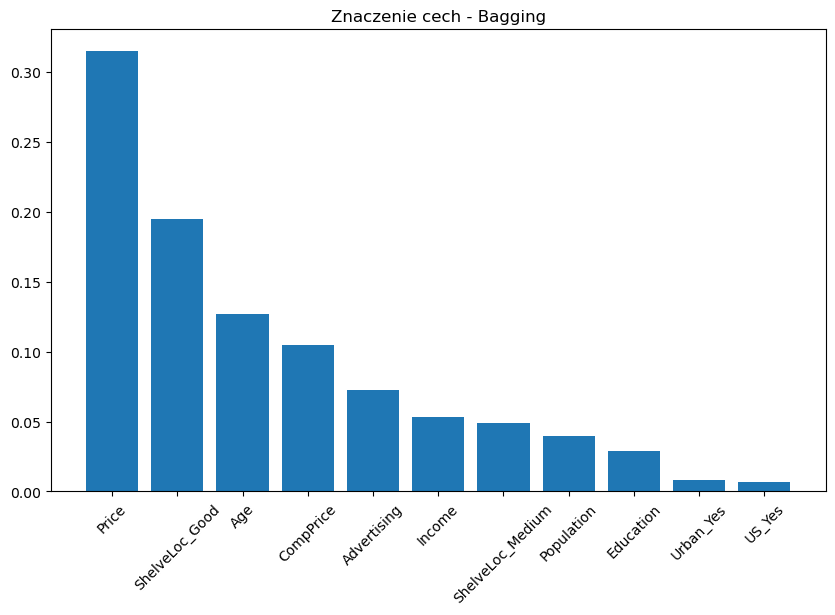

In [4]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import pandas as pd

bagging_model = RandomForestRegressor(
    max_features=X_train.shape[1],
    random_state=42
)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print(f"Testowy MSE dla Baggingu: {mse_bagging:.4f}")

feature_importance_bag = bagging_model.feature_importances_
importance_df_bag = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_bag
}).sort_values(by='Importance', ascending=False)

print("\nZnaczenie cech w Bagging:")
print(importance_df_bag)

plt.figure(figsize=(10, 6))
plt.bar(importance_df_bag['Feature'], importance_df_bag['Importance'])
plt.title("Znaczenie cech - Bagging")
plt.xticks(rotation=45)
plt.show()

# Zadanie 8e


Najlepsza liczba zmiennych (max_features): 6
Testowy MSE dla najlepszego Random Forest: 2.5138

Znaczenie cech w najlepszym modelu Random Forest:
             Feature  Importance
4              Price    0.294134
7     ShelveLoc_Good    0.173853
5                Age    0.129975
0          CompPrice    0.095407
2        Advertising    0.089304
1             Income    0.062416
3         Population    0.056262
8   ShelveLoc_Medium    0.041894
6          Education    0.036440
10            US_Yes    0.012077
9          Urban_Yes    0.008238


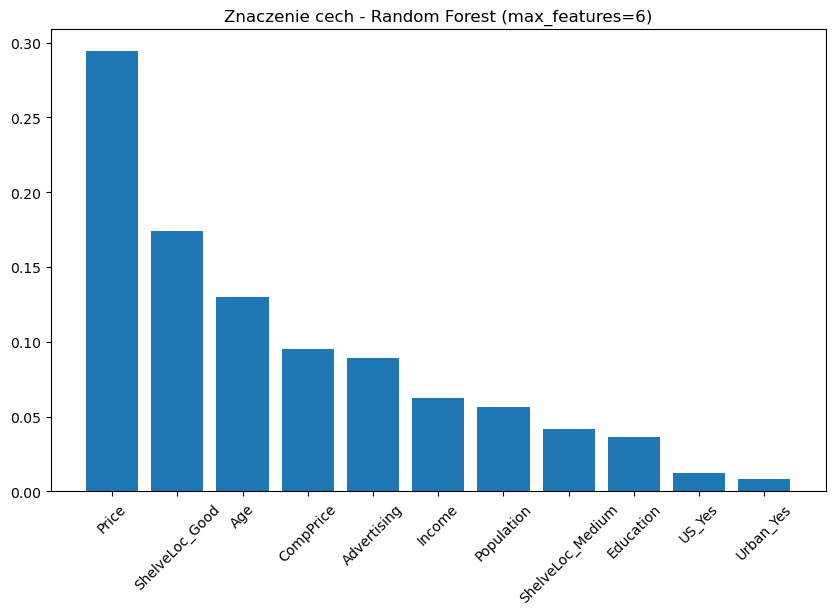

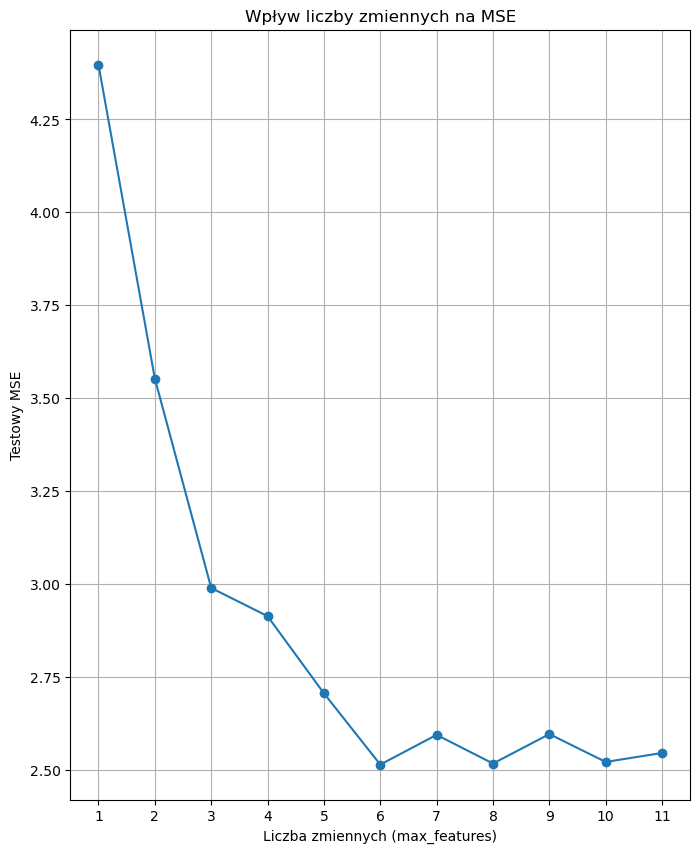

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

max_features_range = list(range(1, X_train.shape[1] + 1))

mse_results = []

for m in max_features_range:
    rf_model = RandomForestRegressor(max_features=m, random_state=42)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append((m, mse))

best_m, best_mse = min(mse_results, key=lambda x: x[1])

best_rf_model = RandomForestRegressor(max_features=best_m, random_state=42)
best_rf_model.fit(X_train, y_train)

feature_importance_rf = best_rf_model.feature_importances_
importance_df_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

print(f"\nNajlepsza liczba zmiennych (max_features): {best_m}")
print(f"Testowy MSE dla najlepszego Random Forest: {best_mse:.4f}")
print("\nZnaczenie cech w najlepszym modelu Random Forest:")
print(importance_df_rf)

plt.figure(figsize=(10, 6))
plt.bar(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.title(f"Znaczenie cech - Random Forest (max_features={best_m})")
plt.xticks(rotation=45)
plt.show()

m_values, mse_values = zip(*mse_results)
plt.figure(figsize=(8, 10))
plt.plot(m_values, mse_values, marker='o')
plt.title("Wpływ liczby zmiennych na MSE")
plt.xlabel("Liczba zmiennych (max_features)")
plt.ylabel("Testowy MSE")
plt.xticks(m_values)
plt.grid(True)
plt.show()

# Zadanie 8f

In [6]:
from ISLP.bart import BART
from sklearn.metrics import mean_squared_error
import pandas as pd

X_train = X_train.astype({"ShelveLoc_Good": int, "ShelveLoc_Medium": int, "Urban_Yes": int, "US_Yes": int})
X_test = X_test.astype({"ShelveLoc_Good": int, "ShelveLoc_Medium": int, "Urban_Yes": int, "US_Yes": int})

bart_model = BART(random_state=42, burnin=5, ndraw=15)
bart_model.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred_bart = bart_model.predict(X_test.to_numpy())

test_mse_bart = mean_squared_error(y_test, y_pred_bart)
print(f"Testowy MSE dla BART: {test_mse_bart:.4f}")

feature_importance_bart = bart_model.variable_inclusion_.mean(axis=0)
importance_df_bart = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance_bart
}).sort_values(by='Importance', ascending=False)

print("\nZnaczenie cech w modelu BART:")
print(importance_df_bart)

Testowy MSE dla BART: 1.3282

Znaczenie cech w modelu BART:
             Feature  Importance
4              Price   33.600000
7     ShelveLoc_Good   30.800000
0          CompPrice   29.400000
8   ShelveLoc_Medium   29.000000
5                Age   28.600000
2        Advertising   27.333333
10            US_Yes   27.266667
9          Urban_Yes   27.133333
1             Income   26.866667
3         Population   23.733333
6          Education   22.133333


# Zadanie 9a

In [7]:
from ISLP import load_data
from sklearn.model_selection import train_test_split

OJ = load_data('OJ')

OJ['Purchase'] = OJ['Purchase'].map({'CH': 0, 'MM': 1})
OJ['Store7'] = OJ['Store7'].map({'No': 0, 'Yes': 1})

train_data, test_data = train_test_split(OJ, train_size=800, random_state=42)

print(f"Rozmiar zbioru treningowego: {len(train_data)}")
print(f"Rozmiar zbioru testowego: {len(test_data)}")

Rozmiar zbioru treningowego: 800
Rozmiar zbioru testowego: 270


# Zadanie 9b

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

X_train = train_data.drop(columns=['Purchase'])
y_train = train_data['Purchase']

X_test = test_data.drop(columns=['Purchase'])
y_test = test_data['Purchase']

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

y_train_pred = tree_model.predict(X_train)
train_error_rate = 1 - accuracy_score(y_train, y_train_pred)
print(f"Błąd na zbiorze treningowym: {train_error_rate:.4f}")

y_test_pred = tree_model.predict(X_test)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred)
print(f"Błąd na zbiorze testowym: {test_error_rate:.4f}")

Błąd na zbiorze treningowym: 0.1525
Błąd na zbiorze testowym: 0.1963


# Zadanie 9c

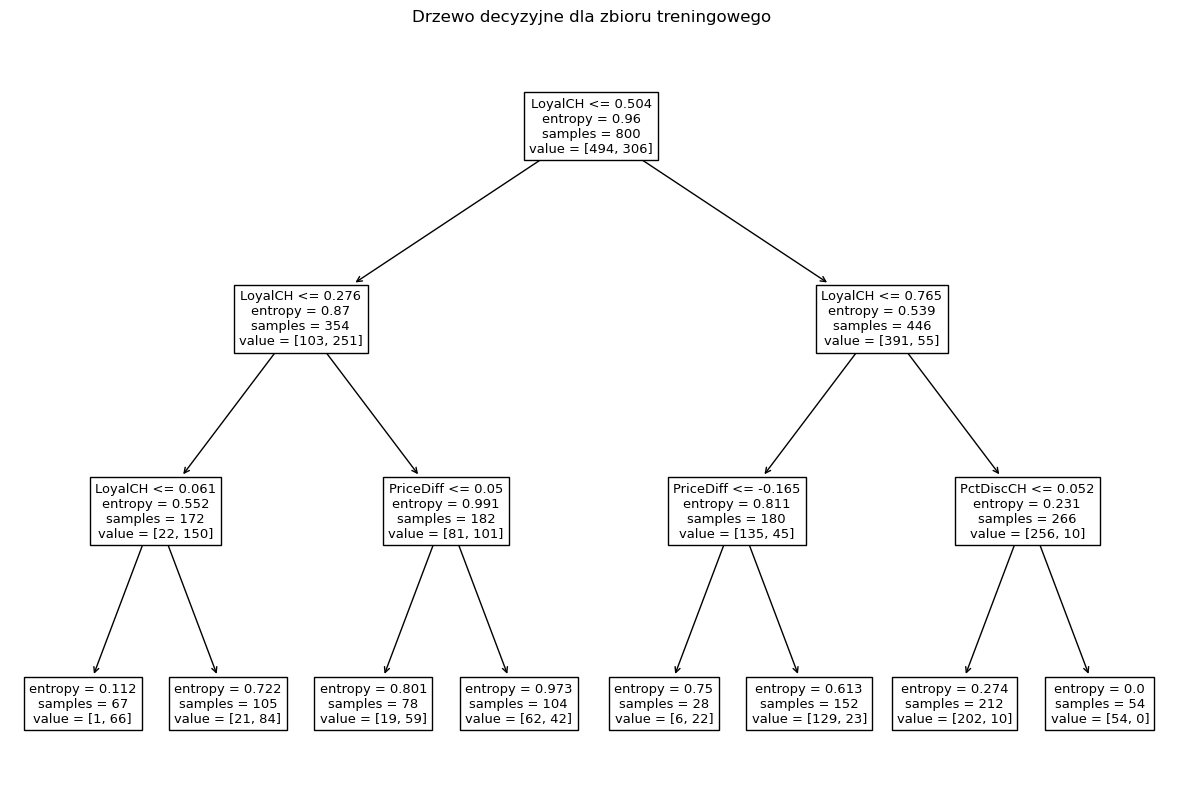

Liczba terminalnych węzłów: 8


In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X_train.columns)
plt.title("Drzewo decyzyjne dla zbioru treningowego")
plt.show()

n_terminal_nodes = sum(tree_model.tree_.children_left == -1)
print(f"Liczba terminalnych węzłów: {n_terminal_nodes}")

# Zadanie 9d

In [10]:
from sklearn.tree import export_text

tree_text = export_text(tree_model, feature_names=list(X_train.columns))
print(tree_text)

|--- LoyalCH <= 0.50
|   |--- LoyalCH <= 0.28
|   |   |--- LoyalCH <= 0.06
|   |   |   |--- class: 1
|   |   |--- LoyalCH >  0.06
|   |   |   |--- class: 1
|   |--- LoyalCH >  0.28
|   |   |--- PriceDiff <= 0.05
|   |   |   |--- class: 1
|   |   |--- PriceDiff >  0.05
|   |   |   |--- class: 0
|--- LoyalCH >  0.50
|   |--- LoyalCH <= 0.76
|   |   |--- PriceDiff <= -0.16
|   |   |   |--- class: 1
|   |   |--- PriceDiff >  -0.16
|   |   |   |--- class: 0
|   |--- LoyalCH >  0.76
|   |   |--- PctDiscCH <= 0.05
|   |   |   |--- class: 0
|   |   |--- PctDiscCH >  0.05
|   |   |   |--- class: 0



# Zadanie 9e

Błąd na zbiorze testowym: 0.1963


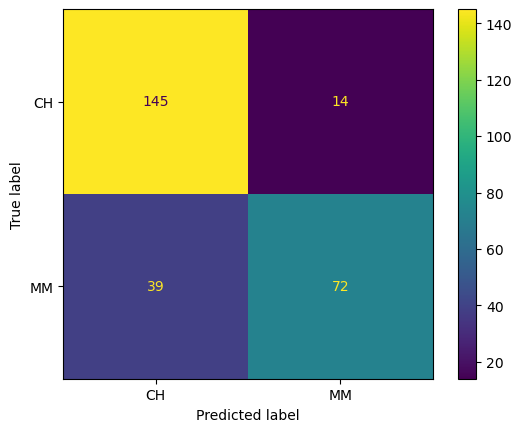

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
cm_test_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_test, display_labels=['CH', 'MM'])
cm_test_display.plot()

y_test_pred = tree_model.predict(X_test)
test_error_rate = 1 - accuracy_score(y_test, y_test_pred)
print(f"Błąd na zbiorze testowym: {test_error_rate:.4f}")

# Zadanie 9f

In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

param_grid = {'max_depth': range(1, 11)}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

print(f"Najlepsza głębokość drzewa (max_depth): {grid_search.best_params_['max_depth']}")
print(f"Najlepszy wynik walidacji (negatywne MSE): {-grid_search.best_score_:.4f}")

optimal_tree = grid_search.best_estimator_
optimal_tree.fit(X_train, y_train)

y_pred_optimal = optimal_tree.predict(X_train)
test_mse_optimal = mean_squared_error(y_train, y_pred_optimal)
print(f"Treningowy średni błąd kwadratowy (MSE) dla optymalnego drzewa: {test_mse_optimal:.4f}")

Najlepsza głębokość drzewa (max_depth): 4
Najlepszy wynik walidacji (negatywne MSE): 0.1850
Treningowy średni błąd kwadratowy (MSE) dla optymalnego drzewa: 0.1450


# Zadanie 9g

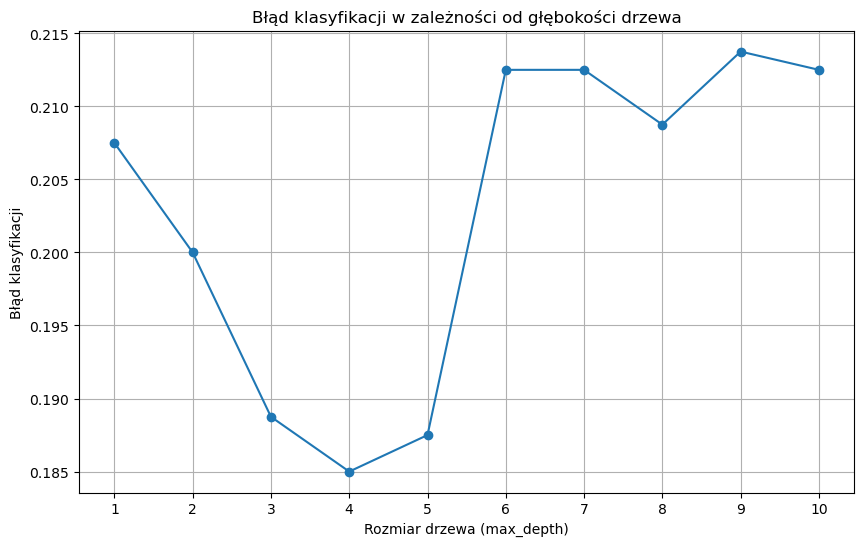

In [13]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

tree_sizes = range(1, 11)
cv_error_rates = []

for max_depth in tree_sizes:
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10, scoring='accuracy')
    error_rate = 1 - np.mean(cv_scores)
    cv_error_rates.append(error_rate)

plt.figure(figsize=(10, 6))
plt.plot(tree_sizes, cv_error_rates, marker='o')
plt.xlabel("Rozmiar drzewa (max_depth)")
plt.ylabel("Błąd klasyfikacji")
plt.title("Błąd klasyfikacji w zależności od głębokości drzewa")
plt.xticks(tree_sizes)
plt.grid(True)
plt.show()

# Zadanie 9i

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

optimal_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
optimal_tree.fit(X_train, y_train)

y_test_pred_optimal = optimal_tree.predict(X_test)
test_error_rate_optimal = 1 - accuracy_score(y_test, y_test_pred_optimal)
print(f"Błąd na zbiorze testowym dla przyciętego drzewa: {test_error_rate_optimal:.4f}")

Błąd na zbiorze testowym dla przyciętego drzewa: 0.2407


# Zadanie 9j

In [15]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

pruned_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
pruned_tree.fit(X_train, y_train)

y_train_pred_unpruned = tree_model.predict(X_train)
train_error_unpruned = 1 - accuracy_score(y_train, y_train_pred_unpruned)

y_train_pred_pruned = pruned_tree.predict(X_train)
train_error_pruned = 1 - accuracy_score(y_train, y_train_pred_pruned)

print(f"Błąd na zbiorze treningowym (drzewo nieprzycięte): {train_error_unpruned:.4f}")
print(f"Błąd na zbiorze treningowym (drzewo przycięte): {train_error_pruned:.4f}")

Błąd na zbiorze treningowym (drzewo nieprzycięte): 0.0075
Błąd na zbiorze treningowym (drzewo przycięte): 0.1450


# Zadanie 9k

In [16]:
y_test_pred_unpruned = tree_model.predict(X_test)
test_error_unpruned = 1 - accuracy_score(y_test, y_test_pred_unpruned)

y_test_pred_pruned = pruned_tree.predict(X_test)
test_error_pruned = 1 - accuracy_score(y_test, y_test_pred_pruned)

print(f"Błąd na zbiorze testowym (drzewo nieprzycięte): {test_error_unpruned:.4f}")
print(f"Błąd na zbiorze testowym (drzewo przycięte): {test_error_pruned:.4f}")

Błąd na zbiorze testowym (drzewo nieprzycięte): 0.2778
Błąd na zbiorze testowym (drzewo przycięte): 0.2407
